In [8]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import json
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [9]:
from google.colab import files
uploaded = files.upload()

Saving k-means-train-data.csv to k-means-train-data.csv


In [10]:
df = pd.read_csv("k-means-train-data.csv")
df.head()

,id,user_name,work_load_per_day,team_work,work_category,work_speed,overall_quality_score
0,1,Fbqve63,"[10, 9, 10, 9, 8, 10, 6, 10, 10, 8, 9, 10, 10,...",85.63,Code Review,12.05,87.75
1,2,Xhjnp94,"[8, 9, 8, 8, 10, 9, 6, 9, 10, 8, 5, 10, 10]",81.42,Email Writing,15.67,79.92
2,3,Llbls85,"[8, 6, 8, 9, 7, 8, 9, 9, 6, 10, 5, 6, 7, 8, 8,...",76.11,Translation,15.78,81.24
3,4,Vzwfg53,"[5, 7, 4, 5, 2, 6, 4, 6, 8, 5, 4, 5, 4, 5]",48.03,Reviewing,39.98,34.01
4,5,Tuasl37,"[3, 3, 1, 6, 3, 4, 2]",37.76,Research,50.57,13.84


In [11]:
# find average of work load
df["work_load_per_day"] = df["work_load_per_day"].apply(json.loads)
df["avg_workload"] = df["work_load_per_day"].apply(lambda x: sum(x) / len(x) if len(x) > 0 else 0)
df

,id,user_name,work_load_per_day,team_work,work_category,work_speed,overall_quality_score,avg_workload
0,1,Fbqve63,"[10, 9, 10, 9, 8, 10, 6, 10, 10, 8, 9, 10, 10,...",85.63,Code Review,12.05,87.75,8.750000
1,2,Xhjnp94,"[8, 9, 8, 8, 10, 9, 6, 9, 10, 8, 5, 10, 10]",81.42,Email Writing,15.67,79.92,8.461538
2,3,Llbls85,"[8, 6, 8, 9, 7, 8, 9, 9, 6, 10, 5, 6, 7, 8, 8,...",76.11,Translation,15.78,81.24,7.611111
3,4,Vzwfg53,"[5, 7, 4, 5, 2, 6, 4, 6, 8, 5, 4, 5, 4, 5]",48.03,Reviewing,39.98,34.01,5.000000
4,5,Tuasl37,"[3, 3, 1, 6, 3, 4, 2]",37.76,Research,50.57,13.84,3.142857
...,...,...,...,...,...,...,...,...
995,996,Baomk42,"[5, 7, 4, 3, 5, 5, 4, 3]",50.47,Graphic Design,49.11,41.14,4.500000
996,997,Wqyal28,"[4, 5, 0, 4, 3, 3, 2, 3, 6, 3, 1, 5]",35.43,Mockup Design,61.43,6.19,3.250000
997,998,Pmgzh47,"[9, 8, 10, 7, 10, 7]",76.85,Flowchart Design,24.44,74.64,8.500000
998,999,Wldbj99,"[6, 10, 8, 7, 8, 8, 9, 10, 10]",91.79,Programming,7.86,89.60,8.444444


In [12]:
# Label encode work_category
label_encoder = LabelEncoder()
df["work_category_encoded"] = label_encoder.fit_transform(df["work_category"])

# Check the result
print(df[["work_category", "work_category_encoded"]])

        work_category  work_category_encoded
0         Code Review                      0
1       Email Writing                      5
2         Translation                     23
3           Reviewing                     18
4            Research                     17
..                ...                    ...
995    Graphic Design                      7
996     Mockup Design                      8
997  Flowchart Design                      6
998       Programming                     14
999  Diagram Creation                      2

[1000 rows x 2 columns]


In [13]:
# Select feature
features = df[[
    "avg_workload",
    "team_work",
    "work_speed",
    "overall_quality_score",
]]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


In [14]:
# apply PCA before K-Means
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
print(f"Original shape: {X_scaled.shape}")
print(f"PCA-reduced shape: {X_pca.shape}")

Original shape: (1000, 4)
PCA-reduced shape: (1000, 1)


k=2 → Silhouette Score: 0.6233
k=3 → Silhouette Score: 0.5905
k=4 → Silhouette Score: 0.5760
k=5 → Silhouette Score: 0.5595
k=6 → Silhouette Score: 0.5533
k=7 → Silhouette Score: 0.5672
k=8 → Silhouette Score: 0.5532
k=9 → Silhouette Score: 0.5494
k=10 → Silhouette Score: 0.5542
k=11 → Silhouette Score: 0.5417
k=12 → Silhouette Score: 0.5226
k=13 → Silhouette Score: 0.5349
k=14 → Silhouette Score: 0.5282
k=15 → Silhouette Score: 0.5291
k=16 → Silhouette Score: 0.5372
k=17 → Silhouette Score: 0.5405
k=18 → Silhouette Score: 0.5284
k=19 → Silhouette Score: 0.5350
k=20 → Silhouette Score: 0.5290


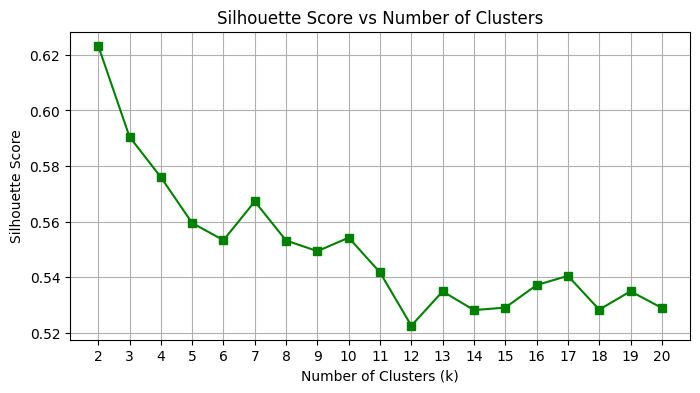

In [15]:
#find best n_cluster by Silhouette Score Method
silhouette_scores = []
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    silhouette_scores.append(score)
    print(f"k={k} → Silhouette Score: {score:.4f}")

# Plot
plt.figure(figsize=(8, 4))
plt.plot(range(2, 21), silhouette_scores, marker='s', color='green')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(range(2, 21))
plt.grid(True)
plt.show()

In [16]:
#Apply K-means
#From graph because we want to find role 2 and 3 is too small number so 7 is best for our scenario.
kmeans = KMeans(n_clusters=7, random_state=42)


In [17]:
# Calculate Silhouette Score
labels = kmeans.fit_predict(X_pca)
score = silhouette_score(X_pca, labels)
print(f"Silhouette Score: {score:.4f}")

# Check if it's good
if score > 0.5:
    print("Good clustering (Silhouette Score > 0.5)")
else:
    print("Clustering might not be ideal (Silhouette Score ≤ 0.5)")

Silhouette Score: 0.5672
Good clustering (Silhouette Score > 0.5)


In [26]:
df["cluster"] = labels
print(df["cluster"].value_counts())
# Optional: look at averages
print(df.groupby("cluster")[[
    "avg_workload",
    "team_work",
    "work_speed",
    "overall_quality_score",
]].mean())



cluster
6    151
3    150
2    149
5    142
1    142
0    134
4    132
Name: count, dtype: int64
         avg_workload  team_work  work_speed  overall_quality_score
cluster                                                            
0            6.063513  63.533731   32.144179              51.284478
1            8.082326  81.671972   16.261127              80.432465
2            4.089130  44.945570   47.089664              22.601678
3            3.096390  35.235133   56.151867               8.239800
4            8.881079  90.499167    7.543182              93.451515
5            7.015583  72.259648   24.644859              64.994437
6            5.120773  54.089404   40.217417              37.775762


| Cluster | Workload | Teamwork | Speed | Quality | Reasoning                                         | Suggested Role |
|---------|----------|----------|--------|---------|---------------------------------------------------|----------------|
| 0       | 6.52     | 67.50    | 29.21  | 57.51   | Solid performance all-around                      | Planner        |
| 1       | 3.68     | 40.65    | 50.22  | 16.47   | Very fast, low quality                            | Slide Maker    |
| 2       | 8.73     | 88.85    | 9.26   | 91.19   | Very high teamwork & quality, slow speed          | Editor         |
| 3       | 4.53     | 48.99    | 44.81  | 28.93   | Quick but light results                           | Idea Maker     |
| 4       | 2.89     | 33.68    | 57.42  | 5.89    | Lowest teamwork, fastest, lowest quality          | Presenter      |
| 5       | 7.65     | 77.75    | 19.53  | 73.91   | Strong leadership, quality, and load              | Team Lead      |
| 6       | 5.44     | 57.29    | 37.15  | 42.42   | Middle-of-the-road performer                      | Helper         |


| Cluster | avg_workload | team_work | work_speed | overall_quality_score | Reasoning                                                                 | Suggested Role Category         |
|---------|--------------|-----------|------------|------------------------|---------------------------------------------------------------------------|---------------------------------|
| 0       | 6.0635       | 63.5337   | 32.1442    | 51.2845                | Balanced but unremarkable — contributes, but may lack initiative          | Balancer             |
| 1       | 8.0823       | 81.6720   | 16.2611    | 80.4325                | High quality and teamwork, but very slow — may hold up the group          | Perfectionist       |
| 2       | 4.0891       | 44.9456   | 47.0897    | 22.6017                | Works quickly but produces low quality| Task finisher       |
| 3       | 3.0964       | 35.2351   | 56.1519    | 8.2398                 | Very fast but extremely low quality and teamwork — risky contributor       | Lone Wolf         |
| 4       | 8.8811       | 90.4992   | 7.5432     | 93.4515                | Takes on everything, delivers high quality | Leader  |
| 5       | 7.0156       | 72.2596   | 24.6449    | 64.9944                | Reliable and collaborative, though slow-moving                            | Helper            |
| 6       | 5.1208       | 54.0894   | 40.2174    | 37.7758                | Mediocre in all areas — lacks standout traits                             | Generalist  |



In [33]:
# map to above table role
cluster_to_role = {
    0: "Balancer",
    1: "Perfectionist",
    2: "Task finisher",
    3: "Lone Wolf",
    4: "Leader",
    5: "Helper",
    6: "Genelarist"
}

df["group_role"] = df["cluster"].map(cluster_to_role)
df

,id,user_name,work_load_per_day,team_work,work_category,work_speed,overall_quality_score,avg_workload,work_category_encoded,cluster,group_role
0,1,Fbqve63,"[10, 9, 10, 9, 8, 10, 6, 10, 10, 8, 9, 10, 10,...",85.63,Code Review,12.05,87.75,8.750000,0,4,Leader
1,2,Xhjnp94,"[8, 9, 8, 8, 10, 9, 6, 9, 10, 8, 5, 10, 10]",81.42,Email Writing,15.67,79.92,8.461538,5,1,Perfectionist
2,3,Llbls85,"[8, 6, 8, 9, 7, 8, 9, 9, 6, 10, 5, 6, 7, 8, 8,...",76.11,Translation,15.78,81.24,7.611111,23,1,Perfectionist
3,4,Vzwfg53,"[5, 7, 4, 5, 2, 6, 4, 6, 8, 5, 4, 5, 4, 5]",48.03,Reviewing,39.98,34.01,5.000000,18,6,Genelarist
4,5,Tuasl37,"[3, 3, 1, 6, 3, 4, 2]",37.76,Research,50.57,13.84,3.142857,17,3,Lone Wolf
...,...,...,...,...,...,...,...,...,...,...,...
995,996,Baomk42,"[5, 7, 4, 3, 5, 5, 4, 3]",50.47,Graphic Design,49.11,41.14,4.500000,7,6,Genelarist
996,997,Wqyal28,"[4, 5, 0, 4, 3, 3, 2, 3, 6, 3, 1, 5]",35.43,Mockup Design,61.43,6.19,3.250000,8,3,Lone Wolf
997,998,Pmgzh47,"[9, 8, 10, 7, 10, 7]",76.85,Flowchart Design,24.44,74.64,8.500000,6,1,Perfectionist
998,999,Wldbj99,"[6, 10, 8, 7, 8, 8, 9, 10, 10]",91.79,Programming,7.86,89.60,8.444444,14,4,Leader


In [34]:
# prompt: export df to csv

df.to_csv('kmean_role_categorize.csv', index=False)
files.download('kmean_role_categorize.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-35-b1831859bafc>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(df['cluster'].unique()))


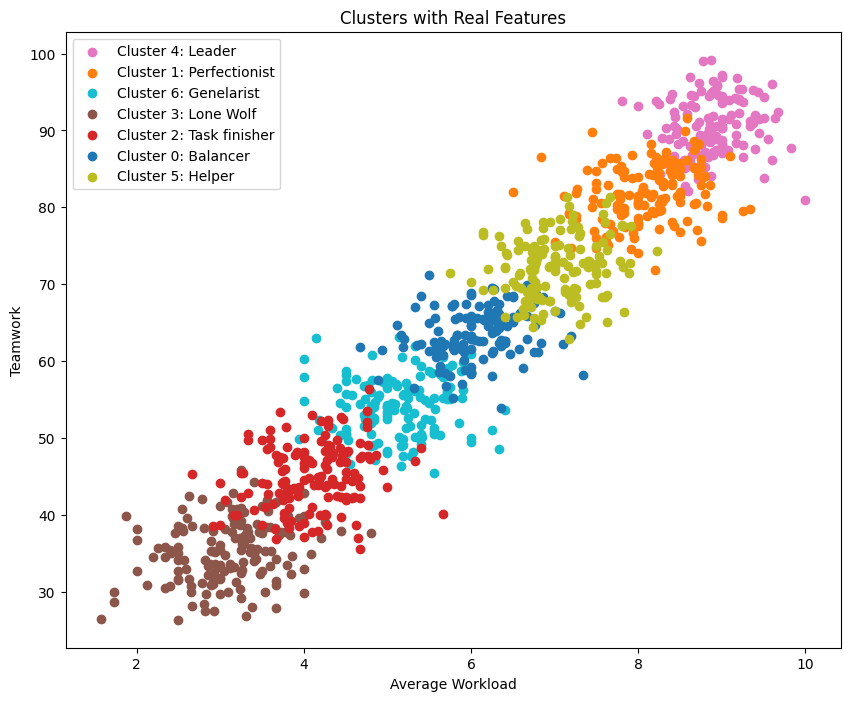

In [35]:
import matplotlib.pyplot as plt

# Assuming 'df' has the real features and 'cluster' and 'group_role' are defined in df

# Create a list of colors
colors = plt.cm.get_cmap('tab10', len(df['cluster'].unique()))

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

# Loop through each cluster and plot it in different colors using real features
for cluster_num in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster_num]
    cluster_color = colors(cluster_num)  # Assign a color based on cluster number
    plt.scatter(cluster_data['avg_workload'],
                cluster_data['team_work'],
                color=cluster_color,
                label=f"Cluster {cluster_num}: {cluster_data['group_role'].iloc[0]}")  # Add role label

# Add labels and title
plt.title("Clusters with Real Features")
plt.xlabel("Average Workload")
plt.ylabel("Teamwork")
plt.legend(loc='best')  # Display legend in the best location

# Show the plot
plt.show()


<ipython-input-36-073ff48e0706>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(df['cluster'].unique()))


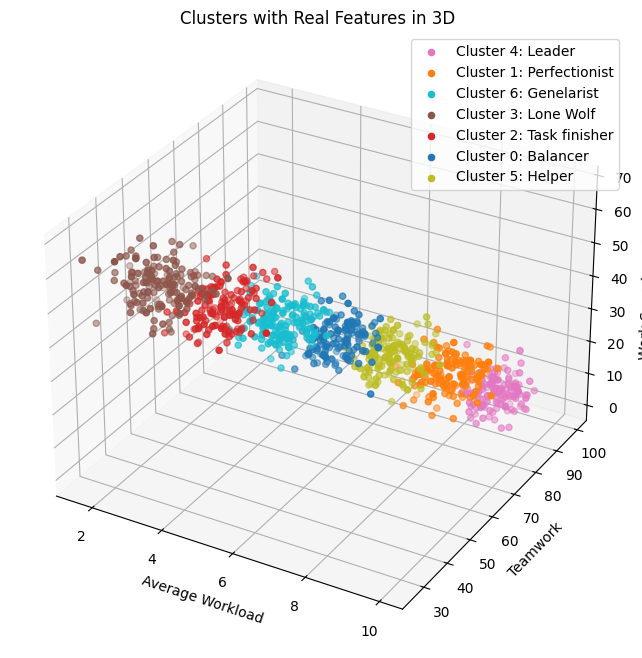

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'df' has the real features and 'cluster' and 'group_role' are defined in df

# Create a list of colors
colors = plt.cm.get_cmap('tab10', len(df['cluster'].unique()))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Loop through each cluster and plot it in different colors using real features
for cluster_num in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster_num]
    cluster_color = colors(cluster_num)  # Assign a color based on cluster number
    ax.scatter(cluster_data['avg_workload'],
               cluster_data['team_work'],
               cluster_data['work_speed'],
               color=cluster_color,
               label=f"Cluster {cluster_num}: {cluster_data['group_role'].iloc[0]}")  # Add role label

# Add labels and title
ax.set_title("Clusters with Real Features in 3D")
ax.set_xlabel("Average Workload")
ax.set_ylabel("Teamwork")
ax.set_zlabel("Work Speed Per Day")
ax.legend(loc='best')

# Show the plot
plt.show()
